## Emanuelle Moço e Giovana Lemes:

Regressão
Pretendemos analisar se a altura de um jogador de basquete influencia na quantidade de pontos que ele faz.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cmath
plt.style.use('ggplot')

In [2]:
! explorer . 

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Emanuelle\Documents\Ciência dos Dados\Projeto 3


In [4]:
#Se usar o arquivo descompactado
dados1 = pd.read_table('Players.csv', encoding="latin1",sep=',')
dados2 = pd.read_table('Seasons_Stats.csv', encoding="latin1",sep=',')
    

In [5]:
tabela_altura = dados1.loc [:,["Player", "height"]]  

In [6]:
#Qual posição tem mais informações? (vamos analisar a que tiver mais informações)
print ("F: {0}".format(len(dados2[dados2.Pos == "F"])))
print ("C: {0}".format(len(dados2[dados2.Pos == "C"])))
print ("G: {0}".format(len(dados2[dados2.Pos == "G"])))
print ("G-F: {0}".format(len(dados2[dados2.Pos == "G-F"])))
print ("F-C: {0}".format(len(dados2[dados2.Pos == "F-C"])))
print ("F-G: {0}".format(len(dados2[dados2.Pos == "F-G"])))
print ("PG: {0}".format(len(dados2[dados2.Pos == "PG"])))
print ("PF: {0}".format(len(dados2[dados2.Pos == "PF"])))
print ("SF: {0}".format(len(dados2[dados2.Pos == "SF"])))
print ("SG: {0}".format(len(dados2[dados2.Pos == "SG"])))

F: 123
C: 4759
G: 139
G-F: 79
F-C: 81
F-G: 60
PG: 4648
PF: 4966
SF: 4699
SG: 4811


In [7]:
dados1.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [8]:
dados1 = dados1.loc[pd.notnull(dados1.height),:]

In [9]:
dados1.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [54]:
dados2.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [11]:
#tabela com dados dos pivos "PF"
tabela_PF = dados2[dados2.Pos == "PF"]
tabela_PF.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
17,17,1950.0,Bob Brannum,PF,24.0,SHE,59.0,NaN,NaN,NaN,...,0.690,NaN,NaN,NaN,205.0,NaN,NaN,NaN,279.0,713.0
23,23,1950.0,Walt Budko,PF,24.0,BLB,66.0,NaN,NaN,NaN,...,0.757,NaN,NaN,NaN,146.0,NaN,NaN,NaN,259.0,595.0
41,41,1950.0,Jack Coleman,PF,25.0,ROC,68.0,NaN,NaN,NaN,...,0.744,NaN,NaN,NaN,153.0,NaN,NaN,NaN,223.0,590.0
45,45,1950.0,Dillard Crocker,PF,25.0,DNN,53.0,NaN,NaN,NaN,...,0.735,NaN,NaN,NaN,85.0,NaN,NaN,NaN,223.0,723.0
68,68,1950.0,Joe Fulks*,PF,28.0,PHW,68.0,NaN,NaN,NaN,...,0.696,NaN,NaN,NaN,56.0,NaN,NaN,NaN,240.0,965.0


In [12]:
#apagar os dados nulos da altura
dados1 = dados1.loc[pd.notnull(dados1.height),:]
dados1.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [13]:
#modificando a tabela_PF para ter apenas os dados que são uteis para nós
#G = games
#FT% = porcentagem de acertos (acertos/quanto tentou)
#AST = assistências 
#PTS = pontos 
tabela_PF = tabela_PF.loc[:,["Player", "G", "FT%",  "AST", "PTS" , "BLK"]]  
tabela_PF.head()

,Player,G,FT%,AST,PTS,BLK
17,Bob Brannum,59.0,0.690,205.0,713.0,NaN
23,Walt Budko,66.0,0.757,146.0,595.0,NaN
41,Jack Coleman,68.0,0.744,153.0,590.0,NaN
45,Dillard Crocker,53.0,0.735,85.0,723.0,NaN
68,Joe Fulks*,68.0,0.696,56.0,965.0,NaN


In [14]:
#criar uma coluna que vai ser os pontos/jogos
testeA = tabela_PF.loc[(tabela_PF.G!=0), 'M_PONTOS'] = tabela_PF.PTS / tabela_PF.G
testeA.head()

17    12.084746
23     9.015152
41     8.676471
45    13.641509
68    14.191176
dtype: float64

In [15]:
testeA.head()

17    12.084746
23     9.015152
41     8.676471
45    13.641509
68    14.191176
dtype: float64

In [16]:
#media da media de pontos por jogo
testeA.mean()

8.093923934856019

In [17]:
#media das altura
tabela_altura.height.mean()

198.70492221372098

In [18]:
#covariancia
tabela_PF.cov()

,G,FT%,AST,PTS,BLK,M_PONTOS
G,693.604935,0.807973,1350.382206,9179.693811,586.997507,85.558076
FT%,0.807973,0.019387,2.466136,19.197398,0.569241,0.256641
AST,1350.382206,2.466136,6017.618989,30870.439742,1602.925762,345.320612
PTS,9179.693811,19.197398,30870.439742,226304.408328,11571.864315,2580.752122
BLK,586.997507,0.569241,1602.925762,11571.864315,1332.640630,125.690100
M_PONTOS,85.558076,0.256641,345.320612,2580.752122,125.690100,34.253197


In [38]:
dados1.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [39]:
df = tabela_PF.set_index('Player').join(dados1.set_index('Player'), how='inner', lsuffix='tabela_PF',rsuffix='dados1')
#df = df[['M_PONTOS','height']].dropna()
#df.plot.scatter('M_PONTOS','height')

#tabela_PF.set_index('M_PONTOS').join(dados1.set_index('height'), lsuffix='_caller', rsuffix='_other')

In [21]:
dados2.Player.value_counts()

Eddie Johnson       33
Mike Dunleavy       32
Gerald Henderson    29
Nazr Mohammed       28
Kevin Willis        27
George Johnson      26
Joe Smith           26
Andre Miller        25
James Edwards       25
Juwan Howard        25
Theo Ratliff        24
Reggie Williams     24
Jim Jackson         24
Tyrone Corbin       24
Kevin Ollie         23
Vince Carter        23
Kevin Garnett       23
Drew Gooden         23
Charles Jones       23
Jason Kidd          23
Charles Smith       23
Rod Strickland      23
Chauncey Billups    23
Kenny Anderson      22
Sam Cassell         22
Avery Johnson       22
Tim Thomas          22
Danny Schayes       22
Herb Williams       22
John Lucas          22
                    ..
Ken Boyd             1
Desmond Ferguson     1
Dave Deutsch         1
Jack Cotton          1
D.C. Wilcutt         1
A.J. Hammons         1
Byron Beck           1
Gary Voce            1
Eddie Phillips       1
James Collins        1
Voise Winters        1
Garret Siler         1
Chink Cross

In [22]:
df.head()

,G,FT%,AST,PTS,BLK,M_PONTOS,Unnamed: 0,height,weight,collage,born,birth_city,birth_state
Player,,,,,,,,,,,,,
A.C. Green,82.0,0.611,54.0,521.0,49.0,6.353659,1723,203.0,106.0,NaN,1960.0,NaN,NaN
A.C. Green,79.0,0.780,84.0,852.0,80.0,10.784810,1723,203.0,106.0,NaN,1960.0,NaN,NaN
A.C. Green,82.0,0.773,93.0,937.0,45.0,11.426829,1723,203.0,106.0,NaN,1960.0,NaN,NaN
A.C. Green,82.0,0.786,103.0,1088.0,55.0,13.268293,1723,203.0,106.0,NaN,1960.0,NaN,NaN
A.C. Green,82.0,0.751,90.0,1061.0,50.0,12.939024,1723,203.0,106.0,NaN,1960.0,NaN,NaN


In [23]:
media = df.loc[(df.G!=0), 'm_ponto'] = df.PTS/df.G
tabela_nova = df.loc[:,["PTS","m_ponto","height"]]


In [24]:
tabela_nova = tabela_nova.loc[pd.notnull(tabela_nova.m_ponto),:]
tabela_nova = tabela_nova.loc[pd.notnull(tabela_nova.height),:]

In [25]:
import numpy as np
import statsmodels.api as sm

Y = tabela_nova["m_ponto"]
X = tabela_nova["height"]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                m_ponto   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07597
Date:                Thu, 09 Nov 2017   Prob (F-statistic):              0.783
Time:                        14:41:54   Log-Likelihood:                -15820.
No. Observations:                4966   AIC:                         3.164e+04
Df Residuals:                    4964   BIC:                         3.166e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          9.0399      3.433      2.633      0.008         2.310    15.770
height        -0.0046      0.017     -0.276      0.783        -0.038     0.028
==============================================================================
Omnibus:                      572.347   Durbin-Watson:                   0.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              785.829
Skew:                           0.958   Prob(JB):                    2.29e-171
Kurtosis:                       3.361   Cond. No.                     8.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Percebemos que não há relevância entre altura e a quantidade de pontos feita.

### Como não houve uma considerável relação entre a altura e a quantidade de pontos, vamos analisar se existe alguma relação entre altura e quantidade de bloqueios.

In [43]:
tabela_BLK = df.loc[pd.notnull(df.BLK),:]

In [44]:
import numpy as np
import statsmodels.api as sm

Y = tabela_BLK["BLK"]
X = tabela_BLK["height"]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BLK   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     82.89
Date:                Thu, 09 Nov 2017   Prob (F-statistic):           1.30e-19
Time:                        14:49:08   Log-Likelihood:                -21499.
No. Observations:                4294   AIC:                         4.300e+04
Df Residuals:                    4292   BIC:                         4.301e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -178.0883     23.016     -7.737      0.000      -223.212  -132.964
height         1.0210      0.112      9.104      0.000         0.801     1.241
==============================================================================
Omnibus:                     1795.983   Durbin-Watson:                   0.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7877.161
Skew:                           2.040   Prob(JB):                         0.00
Kurtosis:                       8.233   Cond. No.                     8.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
#fazer plot dispersao, pontuacao e atura

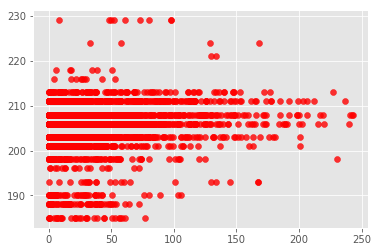

In [55]:
hmax = df.height.max()
hmin = df.height.min()

plt.scatter(tabela_BLK.BLK, tabela_BLK.height, c='red', alpha=0.8)


y=ax

plt.show()

In [62]:
tabela_BLK.describe()

,G,FT%,AST,PTS,BLK,M_PONTOS,Unnamed: 0,height,weight,born
count,4294.000000,4129.000000,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000
mean,50.107592,0.689141,69.583838,479.701910,31.401956,7.854124,2267.655799,205.172566,103.108058,1968.931765
std,26.698523,0.142893,77.161710,469.964744,36.505351,5.815099,796.099244,4.921303,8.239823,13.318257
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,451.000000,185.000000,77.000000,1920.000000
25%,26.000000,0.627000,12.000000,97.000000,6.000000,3.282967,1650.000000,203.000000,99.000000,1960.000000
50%,55.000000,0.711000,45.000000,333.000000,19.000000,6.283784,2249.000000,206.000000,104.000000,1969.000000
75%,76.000000,0.776000,99.000000,746.750000,43.000000,11.225921,2921.000000,208.000000,108.000000,1980.000000
max,86.000000,1.000000,598.000000,2540.000000,243.000000,30.975610,3918.000000,229.000000,136.000000,1997.000000


In [61]:
tabela_BLK.columns

Index(['G', 'FT%', 'AST', 'PTS', 'BLK', 'M_PONTOS', 'Unnamed: 0', 'height',
       'weight', 'collage', 'born', 'birth_city', 'birth_state'],
      dtype='object')

In [71]:
colunas = ['G', 'FT%', 'AST', 'PTS', 'BLK', 'M_PONTOS', 'Unnamed: 0', 'height',
       'weight']

In [78]:
colunas = [ 'BLK',  'height']

In [79]:


Y = tabela_BLK["PTS"]
X = tabela_BLK.loc[:, colunas]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     1833.
Date:                Thu, 09 Nov 2017   Prob (F-statistic):               0.00
Time:                        15:23:59   Log-Likelihood:                -31186.
No. Observations:                4294   AIC:                         6.238e+04
Df Residuals:                    4291   BIC:                         6.240e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1706.5765    221.239      7.714      0.000      1272.834  2140.319
BLK            8.8194      0.146     60.528      0.000         8.534     9.105
height        -7.3295      1.081     -6.781      0.000        -9.449    -5.211
==============================================================================
Omnibus:                     1106.445   Durbin-Watson:                   0.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3386.297
Skew:                           1.315   Prob(JB):                         0.00
Kurtosis:                       6.465   Cond. No.                     8.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
import itertools
import pylab
from mpl_toolkits.mplot3d import Axes3D

In [83]:
p = itertools.permutations(colunas)

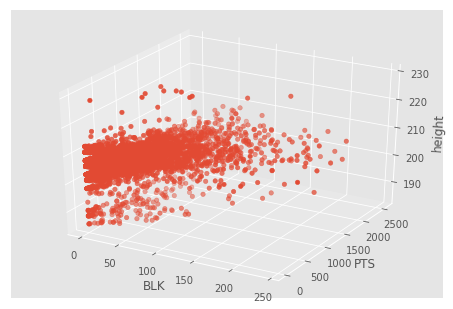

In [87]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(df.BLK,df.PTS,df.height)
ax.set_xlabel("BLK")
ax.set_ylabel("PTS")
ax.set_zlabel("height")

plt.show()